In [74]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from mpl_toolkits.mplot3d import Axes3D 
from dataclasses import dataclass
from sklearn import metrics
from scipy.stats import norm
from numpy.matrixlib.defmatrix import concatenate
from scipy import optimize
from sklearn.model_selection import KFold

In [75]:
# read the data
df = pd.read_excel('Data.xls')


### Data Description

There is a total of 23 diverse features and 1 target variable. The description of features is given below:

LIMIT_BAL: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.

SEX: Gender (1 = male; 2 = female).

EDUCATION: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).

MARRIAGE: Marital status (1 = married; 2 = single; 3 = others).

AGE: Age (year).

PAY_0 - PAY_6: History of past payments.
The past monthly payment records (from April to September 2005)
The measurement scale for the repayment status is:
    -1 = pay duly; 
    1 = payment delay for one month; 
    2 = payment delay for two months; ...; 
    8 = payment delay for eight months; 
    9 = payment delay for nine months and above.

BILL_AMT1 - BILL_AMT6: Amount of bill statement (NT dollar).

PAY_AMT1 - PAY_AMT6: Amount of previous payment (NT dollar).

In [76]:
# get the info oof all columns like datatype and column name
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ID         30000 non-null  int64
 1   LIMIT_BAL  30000 non-null  int64
 2   SEX        30000 non-null  int64
 3   EDUCATION  30000 non-null  int64
 4   MARRIAGE   30000 non-null  int64
 5   AGE        30000 non-null  int64
 6   PAY_0      30000 non-null  int64
 7   PAY_2      30000 non-null  int64
 8   PAY_3      30000 non-null  int64
 9   PAY_4      30000 non-null  int64
 10  PAY_5      30000 non-null  int64
 11  PAY_6      30000 non-null  int64
 12  BILL_AMT1  30000 non-null  int64
 13  BILL_AMT2  30000 non-null  int64
 14  BILL_AMT3  30000 non-null  int64
 15  BILL_AMT4  30000 non-null  int64
 16  BILL_AMT5  30000 non-null  int64
 17  BILL_AMT6  30000 non-null  int64
 18  PAY_AMT1   30000 non-null  int64
 19  PAY_AMT2   30000 non-null  int64
 20  PAY_AMT3   30000 non-null  int64
 21  PAY_AMT4   3

In [77]:
# describe the statistical aspects of dataframe
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Y
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [78]:
# check the number of null columns in dataframe
df.isnull().sum()

ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
Y            0
dtype: int64

### Exploratory Data Analysis

In [79]:
# copy the data frame in to a new one
df_new = df.copy()

In [80]:
# number of unique values in each column of data
df_new.nunique()

ID           30000
LIMIT_BAL       81
SEX              2
EDUCATION        7
MARRIAGE         4
AGE             56
PAY_0           11
PAY_2           11
PAY_3           11
PAY_4           11
PAY_5           10
PAY_6           10
BILL_AMT1    22723
BILL_AMT2    22346
BILL_AMT3    22026
BILL_AMT4    21548
BILL_AMT5    21010
BILL_AMT6    20604
PAY_AMT1      7943
PAY_AMT2      7899
PAY_AMT3      7518
PAY_AMT4      6937
PAY_AMT5      6897
PAY_AMT6      6939
Y                2
dtype: int64

EDUCATION >> This column should have 4 unique values (1,2,3,4) but here there are total 7 unique values that means it doesn't have direct null values but has dummy or wrong values instead of proper categories.

MARRIAGE >> This column should have 3 unique values (1,2,3) but has 4 unique values that means it has some dummy values which needs to be handled

PAY_0 - PAY_6 >> These columns should have 10 unique values (-1, 1 to 9) but has 11 unique values.

In [81]:
df_new['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

Here, 5,6,0 are those dummy variables which are not properly defined. We can assign them into 'Others' category.

In [82]:
# replacing values for Education column
df_new['EDUCATION'].replace([1, 2, 3, 4, 5, 6, 0],
                        ['Graduate School', 'University', 'High School', 'Others', 'Others', 'Others', 'Others'], inplace=True)
print(df_new)
print('--------------------------------------------')
df_new['EDUCATION'].value_counts()

          ID  LIMIT_BAL  SEX    EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
0          1      20000    2   University         1   24      2      2     -1   
1          2     120000    2   University         2   26     -1      2      0   
2          3      90000    2   University         2   34      0      0      0   
3          4      50000    2   University         1   37      0      0      0   
4          5      50000    1   University         1   57     -1      0     -1   
...      ...        ...  ...          ...       ...  ...    ...    ...    ...   
29995  29996     220000    1  High School         1   39      0      0      0   
29996  29997     150000    1  High School         2   43     -1     -1     -1   
29997  29998      30000    1   University         2   37      4      3      2   
29998  29999      80000    1  High School         1   41      1     -1      0   
29999  30000      50000    1   University         1   46      0      0      0   

       PAY_4  ...  BILL_AMT

University         14030
Graduate School    10585
High School         4917
Others               468
Name: EDUCATION, dtype: int64

In [83]:
# check the value count of unique values in column
df_new['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [84]:
# Here, 0 value is the dummy value and not perfectly entered in any category so we need to add that to 'Others' category
# replacing values for marriage column
df_new['MARRIAGE'] = df_new['MARRIAGE'].replace([1, 2, 3, 0],
                        ['Married', 'Single', 'Others', 'Others'])
print(df_new)
print('--------------------------------------------')
df_new['MARRIAGE'].value_counts()

          ID  LIMIT_BAL  SEX    EDUCATION MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
0          1      20000    2   University  Married   24      2      2     -1   
1          2     120000    2   University   Single   26     -1      2      0   
2          3      90000    2   University   Single   34      0      0      0   
3          4      50000    2   University  Married   37      0      0      0   
4          5      50000    1   University  Married   57     -1      0     -1   
...      ...        ...  ...          ...      ...  ...    ...    ...    ...   
29995  29996     220000    1  High School  Married   39      0      0      0   
29996  29997     150000    1  High School   Single   43     -1     -1     -1   
29997  29998      30000    1   University   Single   37      4      3      2   
29998  29999      80000    1  High School  Married   41      1     -1      0   
29999  30000      50000    1   University  Married   46      0      0      0   

       PAY_4  ...  BILL_AMT4  BILL_AMT5

Single     15964
Married    13659
Others       377
Name: MARRIAGE, dtype: int64

In [85]:
print(df_new['PAY_0'].value_counts())
print('--------------------------------------------')
print(df_new['PAY_2'].value_counts())
print('--------------------------------------------')
print(df_new['PAY_3'].value_counts())
print('--------------------------------------------')
print(df_new['PAY_4'].value_counts())
print('--------------------------------------------')
print(df_new['PAY_5'].value_counts())
print('--------------------------------------------')
print(df_new['PAY_6'].value_counts())
print('--------------------------------------------')

 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: PAY_0, dtype: int64
--------------------------------------------
 0    15730
-1     6050
 2     3927
-2     3782
 3      326
 4       99
 1       28
 5       25
 7       20
 6       12
 8        1
Name: PAY_2, dtype: int64
--------------------------------------------
 0    15764
-1     5938
-2     4085
 2     3819
 3      240
 4       76
 7       27
 6       23
 5       21
 1        4
 8        3
Name: PAY_3, dtype: int64
--------------------------------------------
 0    16455
-1     5687
-2     4348
 2     3159
 3      180
 4       69
 7       58
 5       35
 6        5
 1        2
 8        2
Name: PAY_4, dtype: int64
--------------------------------------------
 0    16947
-1     5539
-2     4546
 2     2626
 3      178
 4       84
 7       58
 5       17
 6        4
 8        1
Name: PAY_5, dtype: int64
------------------------------------------

Here, -2 and 0 both are creating redutant information as they are not perfectly categorized. To handle this scenario, we have considered -2 and 0 into the the -1 category.

In [86]:
# update the columns PAY_0 to PAY_6
df_new.loc[(df_new.PAY_0 == -2)  | (df_new.PAY_0 == 0), 'PAY_0'] = -1
df_new.loc[(df_new.PAY_2 == -2)  | (df_new.PAY_2 == 0), 'PAY_2'] = -1
df_new.loc[(df_new.PAY_3 == -2)  | (df_new.PAY_3 == 0), 'PAY_3'] = -1
df_new.loc[(df_new.PAY_4 == -2)  | (df_new.PAY_4 == 0), 'PAY_4'] = -1
df_new.loc[(df_new.PAY_5 == -2)  | (df_new.PAY_5 == 0), 'PAY_5'] = -1
df_new.loc[(df_new.PAY_6 == -2)  | (df_new.PAY_6 == 0), 'PAY_6'] = -1

In [87]:
# update the categorical column sex
df_new['SEX'] = df['SEX'].apply(lambda x: 'Male' if x==1 else 'Female')
df_new

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Y
0,1,20000,Female,University,Married,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,Female,University,Single,26,-1,2,-1,-1,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,Female,University,Single,34,-1,-1,-1,-1,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,Female,University,Married,37,-1,-1,-1,-1,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,Male,University,Married,57,-1,-1,-1,-1,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,Male,High School,Married,39,-1,-1,-1,-1,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,Male,High School,Single,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,Male,University,Single,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,Male,High School,Married,41,1,-1,-1,-1,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [88]:
df_new['SEX'].value_counts()

Female    18112
Male      11888
Name: SEX, dtype: int64

In [89]:
# replacing values for Education column
df_new['Y'].replace([0,1], ['No', 'Yes'], inplace=True)
df_new

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Y
0,1,20000,Female,University,Married,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,Yes
1,2,120000,Female,University,Single,26,-1,2,-1,-1,...,3272,3455,3261,0,1000,1000,1000,0,2000,Yes
2,3,90000,Female,University,Single,34,-1,-1,-1,-1,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,No
3,4,50000,Female,University,Married,37,-1,-1,-1,-1,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,No
4,5,50000,Male,University,Married,57,-1,-1,-1,-1,...,20940,19146,19131,2000,36681,10000,9000,689,679,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,Male,High School,Married,39,-1,-1,-1,-1,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,No
29996,29997,150000,Male,High School,Single,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,No
29997,29998,30000,Male,University,Single,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,Yes
29998,29999,80000,Male,High School,Married,41,1,-1,-1,-1,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,Yes


#### Categorical Columns

In [90]:
color = ['#FFB8BF', '#3CDFFF']


Text(0.5, 1.0, 'Default payment set for Next Month')

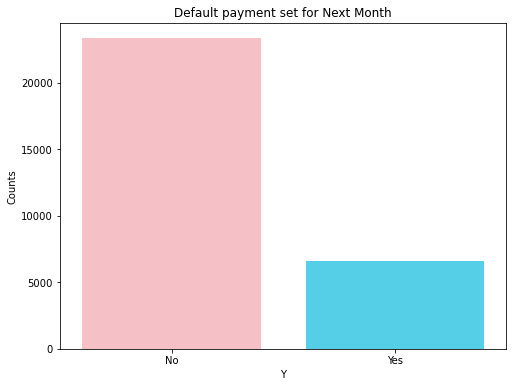

In [91]:
# plot the graph to check distribution of target variable
df_1 = df_new.groupby('Y').size().reset_index(name = 'Counts')
df_1
plt.figure(figsize=(8,6))
sns.barplot(x ='Y', y ='Counts', data = df_1, palette = color)
plt.title('Default payment set for Next Month')

Therefore, we can say that the data is imbalanced and majority of the data has value which has default payment status as '0' (Not set the default payment)

In [92]:
# create a grouped data frames of different categorical features like SEX, MARRIAGE, EDUCATION

df_2 = df_new.groupby(['SEX', 'Y']).count()['ID'].reset_index(name = 'count')
print(df_2)
print('-------------------------------------------------------')
df_3 =df_new.groupby(['MARRIAGE', 'Y']).count()['ID'].reset_index(name = 'count')
print(df_3)
print('-------------------------------------------------------')
df_4 =df_new.groupby(['EDUCATION', 'Y']).count()['ID'].reset_index(name = 'count')
print(df_4)

      SEX    Y  count
0  Female   No  14349
1  Female  Yes   3763
2    Male   No   9015
3    Male  Yes   2873
-------------------------------------------------------
  MARRIAGE    Y  count
0  Married   No  10453
1  Married  Yes   3206
2   Others   No    288
3   Others  Yes     89
4   Single   No  12623
5   Single  Yes   3341
-------------------------------------------------------
         EDUCATION    Y  count
0  Graduate School   No   8549
1  Graduate School  Yes   2036
2      High School   No   3680
3      High School  Yes   1237
4           Others   No    435
5           Others  Yes     33
6       University   No  10700
7       University  Yes   3330


<AxesSubplot:xlabel='EDUCATION'>

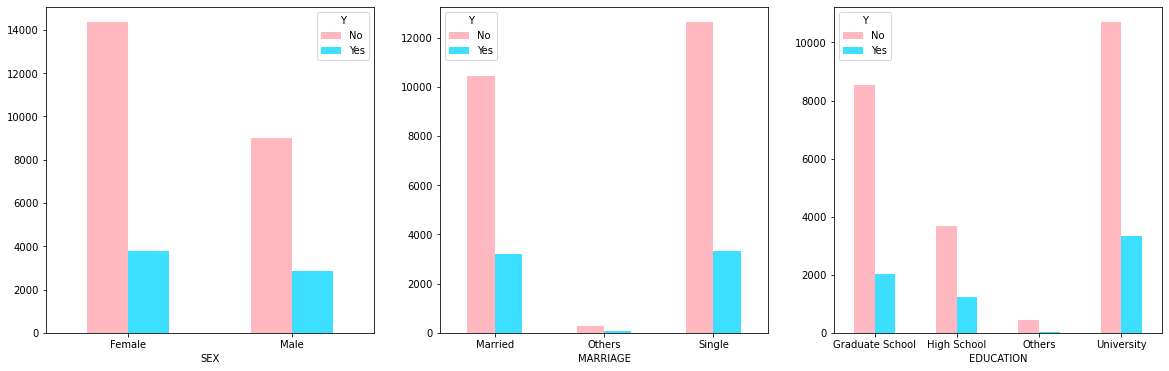

In [93]:
# plots of Different categorical features such as SEX, EDUCATION, MARRIAGE
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,6))
df_g1 =df_2.pivot_table(index = ['SEX'], columns = 'Y', values = 'count', aggfunc='first')
df_g1.plot(kind = 'bar', rot=0, ax=ax1, color = color)

df_g2 = df_3.pivot_table(index = ['MARRIAGE'], columns = 'Y', values = 'count', aggfunc= 'first')
df_g2.plot(kind = 'bar', rot=0, ax=ax2, color = color)

df_g3 = df_4.pivot_table(index = ['EDUCATION'], columns = 'Y', values = 'count', aggfunc= 'first')
df_g3.plot(kind = 'bar', rot=0, ax=ax3, color = color)

In [94]:
df_1 = df_new.groupby(['PAY_0', 'Y']).count()['ID'].reset_index(name = 'count')
df_2 = df_new.groupby(['PAY_2', 'Y']).count()['ID'].reset_index(name = 'count')
df_3 = df_new.groupby(['PAY_3', 'Y']).count()['ID'].reset_index(name = 'count')
df_4 = df_new.groupby(['PAY_4', 'Y']).count()['ID'].reset_index(name = 'count')
df_5 = df_new.groupby(['PAY_5', 'Y']).count()['ID'].reset_index(name = 'count')
df_6 = df_new.groupby(['PAY_6', 'Y']).count()['ID'].reset_index(name = 'count')

<AxesSubplot:ylabel='PAY_0'>

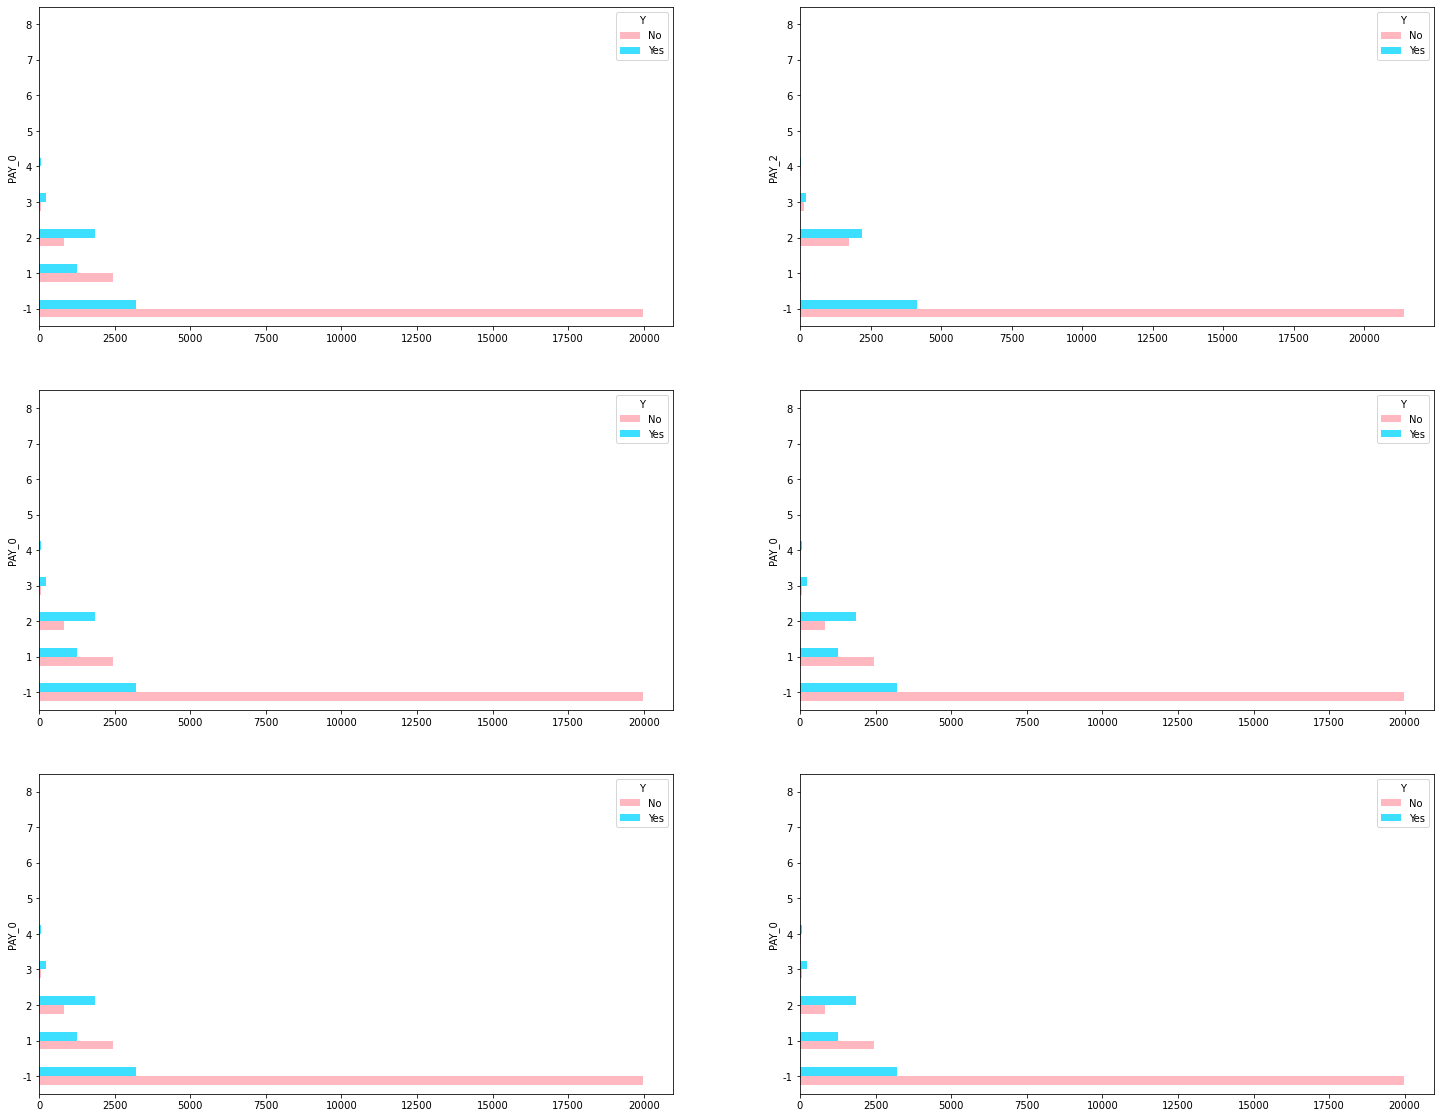

In [95]:
# plots of Different categorical features such as payment delays based on different months in 2005
fig, ((ax1,ax2),(ax3,ax4), (ax5,ax6)) = plt.subplots(3, 2, figsize=(25,20))

df_g1 =df_1.pivot_table(index = ['PAY_0'], columns = 'Y', values = 'count', aggfunc='first')
df_g1.plot(kind = 'barh', rot=0, ax=ax1, color = color)

df_g2 =df_2.pivot_table(index = ['PAY_2'], columns = 'Y', values = 'count', aggfunc='first')
df_g2.plot(kind = 'barh', rot=0, ax=ax2, color = color)

df_g3 =df_3.pivot_table(index = ['PAY_3'], columns = 'Y', values = 'count', aggfunc='first')
df_g1.plot(kind = 'barh', rot=0, ax=ax3, color = color)

df_g4 =df_4.pivot_table(index = ['PAY_4'], columns = 'Y', values = 'count', aggfunc='first')
df_g1.plot(kind = 'barh', rot=0, ax=ax4, color = color)

df_g5 =df_5.pivot_table(index = ['PAY_5'], columns = 'Y', values = 'count', aggfunc='first')
df_g1.plot(kind = 'barh', rot=0, ax=ax5, color = color)

df_g6 =df_6.pivot_table(index = ['PAY_6'], columns = 'Y', values = 'count', aggfunc='first')
df_g1.plot(kind = 'barh', rot=0, ax=ax6, color = color)

In [96]:
df_g1

Y,No,Yes
PAY_0,,
-1,19975,3207
1,2436,1252
2,823,1844
3,78,244
4,24,52
5,13,13
6,5,6
7,2,7
8,8,11


#### Numerical Columns

c:\Users\yesha\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


Text(0.5, 1.0, 'Average credit limit vs Age')

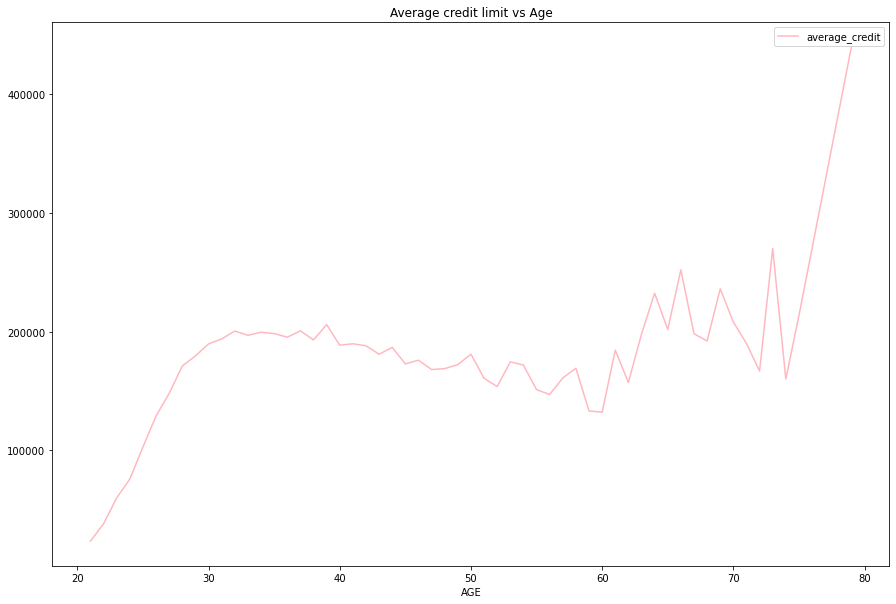

In [145]:
# Credit limit given based on different Age
df_age = df_new[['AGE', 'LIMIT_BAL']]
# sort the values based on age
df_age.sort_values(by= 'AGE', inplace = True)
df_age = df_age.groupby('AGE').mean()['LIMIT_BAL'].reset_index(name = 'average_credit')
df_age['average_credit'] = df_age['average_credit'].round(2)
# make age as the index of the data to plot the graph
df_age.plot(kind = 'line', x='AGE', figsize=(15,10), color = color)
plt.title('Average credit limit vs Age')

c:\Users\yesha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\yesha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


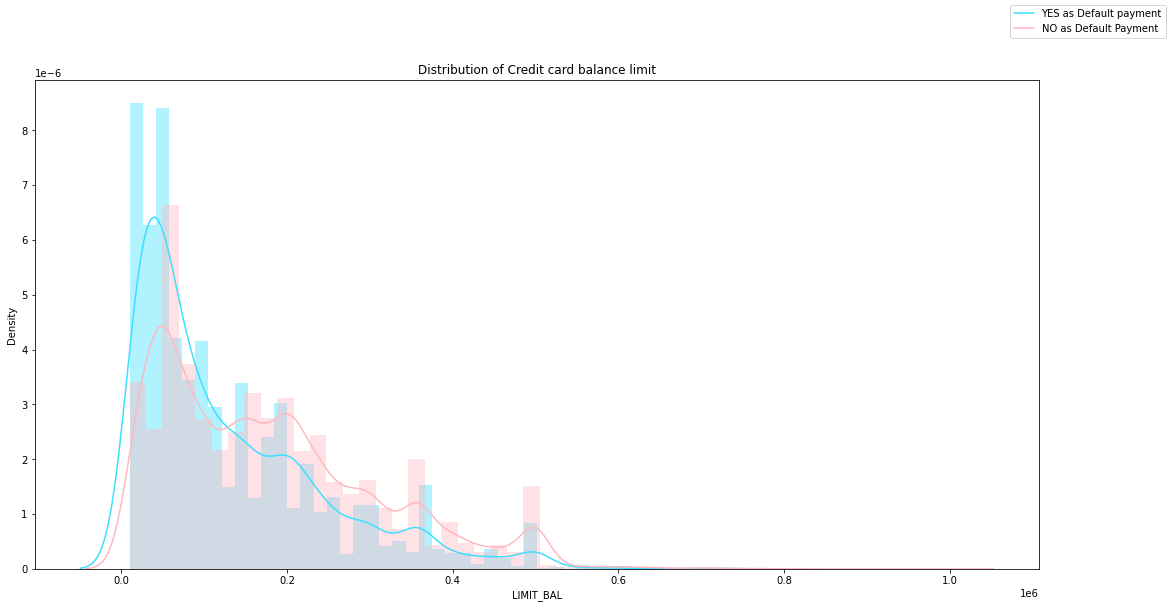

In [98]:
# Distribution of credit card balance in both default and not default cases
fig = plt.figure(figsize=(18,9))
sns.distplot(df_new['LIMIT_BAL'].loc[df_new['Y'] == 'Yes'], color='#3CDFFF')
sns.distplot(df_new['LIMIT_BAL'].loc[df_new['Y'] == 'No'], color='#FFB8BF')
plt.title('Distribution of Credit card balance limit')
fig.legend(labels=['YES as Default payment','NO as Default Payment'])
plt.show()

In this chart, it is visible that the default payment is there, if they have lower credit limit and it is NO default payment if they have higher credit limit. Usually, credit card companies give the more credit who has better credit score which is directly affected how you use and overall payment history, therefore chances of getting the default payment as YES is lower in high credit limit people.

<AxesSubplot:>

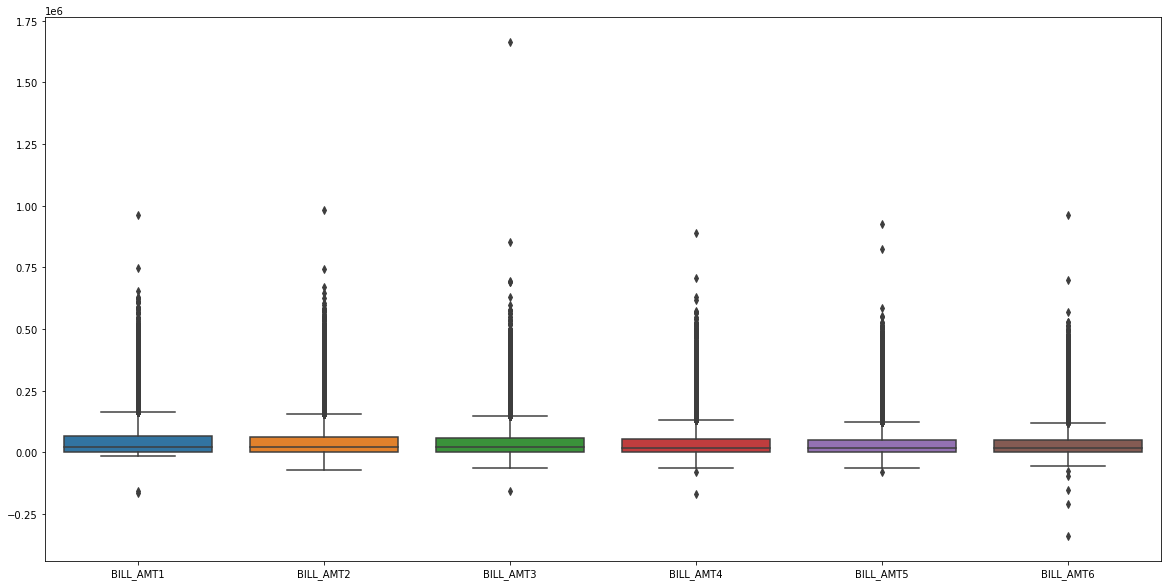

In [99]:
# Boxplot of Bill Amount and Pay Amount
plt.figure(figsize=(20,10))
cols = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
sns.boxplot(data=df[cols])

In [146]:
# drop the ID column
df = df.drop(columns = ['ID'],  axis=1, errors='ignore')
# Correlation between different features
corr = df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(round(corr,2), annot=True, cmap='RdYlGn')
plt.title('Correlation Heatmap for Different Features')

KeyError: "['ID'] not found in axis"

From the above heatmap, it can be seen that the bill amount is highly correlated with the bill amount of the consecutive month.

### Data Pre-Processing

In [101]:
df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Y
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [102]:
# number of unique values in each column
df.nunique()

LIMIT_BAL       81
SEX              2
EDUCATION        7
MARRIAGE         4
AGE             56
PAY_0           11
PAY_2           11
PAY_3           11
PAY_4           11
PAY_5           10
PAY_6           10
BILL_AMT1    22723
BILL_AMT2    22346
BILL_AMT3    22026
BILL_AMT4    21548
BILL_AMT5    21010
BILL_AMT6    20604
PAY_AMT1      7943
PAY_AMT2      7899
PAY_AMT3      7518
PAY_AMT4      6937
PAY_AMT5      6897
PAY_AMT6      6939
Y                2
dtype: int64

In [103]:
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

Education should have only 4 unique values which are 1,2,3,4 but here 0,5,6 are not proper values so we will replace those with 4 which represents Other category

In [104]:
df['EDUCATION'].loc[(df.EDUCATION == 5) | (df.EDUCATION == 6) | (df.EDUCATION == 0)] = 4
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

In [105]:
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

Marriage should have only 3 unique values which are 1,2,3 but here, 0 is not correctly cateogarized.

In [106]:
df['MARRIAGE'].loc[ (df.MARRIAGE == 0)] = 3
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

In [107]:
print(df['PAY_0'].value_counts())
print('--------------------------------------------')
print(df['PAY_2'].value_counts())
print('--------------------------------------------')
print(df['PAY_3'].value_counts())
print('--------------------------------------------')
print(df['PAY_4'].value_counts())
print('--------------------------------------------')
print(df['PAY_5'].value_counts())
print('--------------------------------------------')
print(df['PAY_6'].value_counts())
print('--------------------------------------------')

 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: PAY_0, dtype: int64
--------------------------------------------
 0    15730
-1     6050
 2     3927
-2     3782
 3      326
 4       99
 1       28
 5       25
 7       20
 6       12
 8        1
Name: PAY_2, dtype: int64
--------------------------------------------
 0    15764
-1     5938
-2     4085
 2     3819
 3      240
 4       76
 7       27
 6       23
 5       21
 1        4
 8        3
Name: PAY_3, dtype: int64
--------------------------------------------
 0    16455
-1     5687
-2     4348
 2     3159
 3      180
 4       69
 7       58
 5       35
 6        5
 1        2
 8        2
Name: PAY_4, dtype: int64
--------------------------------------------
 0    16947
-1     5539
-2     4546
 2     2626
 3      178
 4       84
 7       58
 5       17
 6        4
 8        1
Name: PAY_5, dtype: int64
------------------------------------------

In [108]:
# update the columns PAY_0 to PAY_6
df.loc[(df.PAY_0 == -2) | (df.PAY_0 == -1) | (df.PAY_0 == 0), 'PAY_0'] = 0
df.loc[(df.PAY_2 == -2) | (df.PAY_2 == -1) | (df.PAY_2 == 0), 'PAY_2'] = 0
df.loc[(df.PAY_3 == -2) | (df.PAY_3 == -1) | (df.PAY_3 == 0), 'PAY_3'] = 0
df.loc[(df.PAY_4 == -2) | (df.PAY_4 == -1) | (df.PAY_4 == 0), 'PAY_4'] = 0
df.loc[(df.PAY_5 == -2) | (df.PAY_5 == -1) | (df.PAY_5 == 0), 'PAY_5'] = 0
df.loc[(df.PAY_6 == -2) | (df.PAY_6 == -1) | (df.PAY_6 == 0), 'PAY_6'] = 0
df.head(5)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Y
0,20000,2,2,1,24,2,2,0,0,0,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,0,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,0,0,0,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [109]:
df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Y
0,20000,2,2,1,24,2,2,0,0,0,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,0,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,0,0,0,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,1,3,2,43,0,0,0,0,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,30000,1,2,2,37,4,3,2,0,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,80000,1,3,1,41,1,0,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


### Feature Engineering

In [110]:
df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Y
0,20000,2,2,1,24,2,2,0,0,0,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,0,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,0,0,0,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,1,3,2,43,0,0,0,0,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,30000,1,2,2,37,4,3,2,0,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,80000,1,3,1,41,1,0,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


#### Adding new features to dataframe

In [111]:
# Average expenditure of a client for the past one month
df['Avg_exp_1m'] = ((df['BILL_AMT6'] - df['PAY_AMT6'])/df['LIMIT_BAL'])

# Average expenditure of a client for the past two months
df['Avg_exp_2m'] = ((df['BILL_AMT6'] + (df['BILL_AMT5'] - df['PAY_6'] - 
                                       df['PAY_AMT5']))/2) / df['LIMIT_BAL']

# Average expenditure of a client for the past three months
df['Avg_exp_3m'] = ((df['BILL_AMT6'] + df['BILL_AMT5'] + df['BILL_AMT4'] -
                     df['PAY_6'] - df['PAY_AMT5'] - 
                     df['PAY_AMT4'])/3) / df['LIMIT_BAL']

# Average expenditure of a client for the past four months
df['Avg_exp_4m'] = ((df['BILL_AMT6'] + df['BILL_AMT5'] + df['BILL_AMT4'] + 
                     df['BILL_AMT3'] - df['PAY_6'] - df['PAY_AMT5'] - 
                     df['PAY_AMT4'] - df['PAY_AMT3'])/4) / df['LIMIT_BAL']

# Average expenditure of a client for the past five months
df['Avg_exp_5m'] = ((df['BILL_AMT6'] + df['BILL_AMT5'] + df['BILL_AMT4'] + 
                     df['BILL_AMT3'] + df['BILL_AMT2'] - df['PAY_6'] - 
                     df['PAY_AMT5'] - df['PAY_AMT4'] - df['PAY_AMT3'] - 
                     df['PAY_AMT2'])/5) / df['LIMIT_BAL']

# Average expenditure of a client for the past six months
df['Avg_exp_6m'] = ((df['BILL_AMT6'] + df['BILL_AMT5'] + df['BILL_AMT4'] + 
                     df['BILL_AMT3'] + df['BILL_AMT2'] + df['BILL_AMT1'] - 
                     df['PAY_6'] - df['PAY_AMT5'] - df['PAY_AMT4'] - 
                     df['PAY_AMT3'] - df['PAY_AMT2'] - df['PAY_AMT1']
                     )/6) / df['LIMIT_BAL']

In [112]:
# represent the total utilization have been done from the available credit limit for given months

df['Utilization_6'] = (df.LIMIT_BAL - df.BILL_AMT6) / df.LIMIT_BAL
df['Utilization_5'] = (df.LIMIT_BAL - df.BILL_AMT5) / df.LIMIT_BAL
df['Utilization_4'] = (df.LIMIT_BAL - df.BILL_AMT4) / df.LIMIT_BAL
df['Utilization_3'] = (df.LIMIT_BAL - df.BILL_AMT3) / df.LIMIT_BAL
df['Utilization_2'] = (df.LIMIT_BAL - df.BILL_AMT2) / df.LIMIT_BAL
df['Utilization_1'] = (df.LIMIT_BAL - df.BILL_AMT1) / df.LIMIT_BAL

In [113]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,Avg_exp_3m,Avg_exp_4m,Avg_exp_5m,Avg_exp_6m,Utilization_6,Utilization_5,Utilization_4,Utilization_3,Utilization_2,Utilization_1
0,20000,2,2,1,24,2,2,0,0,0,...,0.000000,0.008613,0.031020,0.058458,1.000000,1.000000,1.000000,0.965550,0.844900,0.804350
1,120000,2,2,2,26,0,2,0,0,0,...,0.024961,0.022225,0.018988,0.019549,0.972825,0.971208,0.972733,0.977650,0.985625,0.977650
2,90000,2,2,2,34,0,0,0,0,0,...,0.158622,0.153853,0.150920,0.177102,0.827233,0.833911,0.840767,0.849344,0.844144,0.675122
3,50000,2,2,1,37,0,0,0,0,0,...,0.564340,0.663710,0.715824,0.746487,0.409060,0.420820,0.433720,0.014180,0.035340,0.060200
4,50000,1,2,1,57,0,0,0,0,0,...,0.330187,0.376815,0.177408,0.169897,0.617380,0.617080,0.581200,0.283300,0.886600,0.827660


#### Feature Scaling

In [114]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'Y',
       'Avg_exp_1m', 'Avg_exp_2m', 'Avg_exp_3m', 'Avg_exp_4m', 'Avg_exp_5m',
       'Avg_exp_6m', 'Utilization_6', 'Utilization_5', 'Utilization_4',
       'Utilization_3', 'Utilization_2', 'Utilization_1'],
      dtype='object')

Newly added features are scaled. We need to apply scaling over the other numeric features to make sure that all features look like standard normally distributed data.

In [115]:
scaler = StandardScaler()

# list of columns which needs to be scaled
cols = ['LIMIT_BAL' , 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 
        'PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',]

df[cols] = scaler.fit_transform(df[cols])

Here, we have applied standard scaler to scale the numeric features. This scaling method removes the mean and scal to unit variance.

z = (x - u)/s

where, u = mean of the samples, s = standard deviation of samples

In [116]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,Avg_exp_3m,Avg_exp_4m,Avg_exp_5m,Avg_exp_6m,Utilization_6,Utilization_5,Utilization_4,Utilization_3,Utilization_2,Utilization_1
0,-1.136720,2,2,1,-1.246020,2,2,0,0,0,...,0.000000,0.008613,0.031020,0.058458,1.000000,1.000000,1.000000,0.965550,0.844900,0.804350
1,-0.365981,2,2,2,-1.029047,0,2,0,0,0,...,0.024961,0.022225,0.018988,0.019549,0.972825,0.971208,0.972733,0.977650,0.985625,0.977650
2,-0.597202,2,2,2,-0.161156,0,0,0,0,0,...,0.158622,0.153853,0.150920,0.177102,0.827233,0.833911,0.840767,0.849344,0.844144,0.675122
3,-0.905498,2,2,1,0.164303,0,0,0,0,0,...,0.564340,0.663710,0.715824,0.746487,0.409060,0.420820,0.433720,0.014180,0.035340,0.060200
4,-0.905498,1,2,1,2.334029,0,0,0,0,0,...,0.330187,0.376815,0.177408,0.169897,0.617380,0.617080,0.581200,0.283300,0.886600,0.827660


#### Split data into Train & Test

In [117]:
# take all columns from dataframe except target column 'Y'
X = df.iloc[:, df.columns!='Y']
# take the target column 'Y'
y = df.iloc[:, df.columns=='Y']

# split the data into train and test dataset in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [118]:
Train = pd.merge(X_train, y_train, left_index=True, right_index=True)
Train_SVM = Train
Train_Balance = Train
Train = np.array(Train, dtype=np.float64)
Train

array([[ 0.55890707,  2.        ,  1.        , ...,  1.        ,
         1.        ,  1.        ],
       [-0.90549825,  2.        ,  1.        , ...,  0.95044   ,
         0.9314    ,  0.        ],
       [-0.90549825,  2.        ,  2.        , ...,  0.09682   ,
         0.07594   ,  0.        ],
       ...,
       [-0.90549825,  1.        ,  1.        , ...,  1.        ,
         1.        ,  0.        ],
       [-0.75135032,  2.        ,  2.        , ..., -0.00697143,
        -0.05627143,  1.        ],
       [-0.05768464,  2.        ,  2.        , ...,  1.000125  ,
         1.000125  ,  1.        ]])

In [119]:
Test = pd.merge(X_test, y_test, left_index=True, right_index=True)
Test_SVM = Test
Test = np.array(Test, dtype=np.float64)
Test

array([[-1.05964618e+00,  1.00000000e+00,  2.00000000e+00, ...,
         6.64600000e-01,  7.04533333e-01,  0.00000000e+00],
       [-1.34758607e-01,  2.00000000e+00,  1.00000000e+00, ...,
         1.62326667e-01,  8.84266667e-02,  0.00000000e+00],
       [-7.51350323e-01,  2.00000000e+00,  3.00000000e+00, ...,
         1.31428571e-02, -1.74285714e-03,  0.00000000e+00],
       ...,
       [-5.97202394e-01,  1.00000000e+00,  2.00000000e+00, ...,
         4.44888889e-02,  6.97222222e-02,  0.00000000e+00],
       [ 4.04759145e-01,  2.00000000e+00,  2.00000000e+00, ...,
         3.66122727e-01,  3.79290909e-01,  0.00000000e+00],
       [ 6.35981039e-01,  2.00000000e+00,  1.00000000e+00, ...,
         9.84088000e-01,  9.89968000e-01,  0.00000000e+00]])

### Model Evaluation Metrics

In [120]:
#@title Model Evaluation Metrics
def model_evaluation(name_of_model, y_test, y_pred):
    import json
    from sklearn import metrics
    evaluation = {}
    # Calculate accuracy, precision, recall, f1-score, and kappa score
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    roc_auc_score = metrics.roc_auc_score(y_test, y_pred)
    evaluation.update({"model":name_of_model,"accuracy": acc,"precision":prec,
                       "recall":rec,"f1 score":f1,
                       "roc_auc_score":roc_auc_score})
    print(json.dumps(evaluation, indent=4, sort_keys=True))
    return evaluation

### Logistic Regression

In [121]:
# Logistic Regression { vertical-output: true }
import string
@dataclass
class LogisticRegression:

    maxIteration: int
    learningRate: float
    epsilon: float
    train: np.array
    test: np.array


    def __post_init__(self):
        self.train_X, self.test_X, self.train_y, self.test_y = self.dataReader()
        self.train_X = self.addX0(self.train_X)
        self.test_X = self.addX0(self.test_X)
        

    def dataReader(self):

        train_df = self.train
        test_df = self.test
        train_X, train_y = train_df[:, :-1], train_df[:, -1]
        test_X, test_y = test_df[:, :-1], test_df[:, -1]
        return train_X, test_X, train_y, test_y


    def addX0(self, X):
        return np.column_stack([np.ones(X.shape[0]), X])

    def sigmoid(self, z):
        sig = 1 / (1+np.exp(-z))
        return sig 

    def predict(self, X):
        return X.dot(self.w)

    def costFunction(self, X, y):
        sigm = self.predict(X)
        cost = (np.log(np.ones(X.shape[0]) + np.exp(sigm)) - sigm*y).sum()

        return cost

    def costDerivative(self, X, y):
        sigm = self.sigmoid(self.predict(X))
        grad = (sigm - y).dot(X)
        return grad

    def gradientDescent(self, X, y):
        self.errors= {}
        lasterror = float('inf')
        for i in tqdm(range(self.maxIteration)):
            self.w = self.w - self.learningRate*self.costDerivative(X, y)
            currenterror = self.costFunction(X, y)
            self.errors.update({i+1: currenterror})
            diff = abs(lasterror - currenterror)
            lasterror = currenterror
            if diff < self.epsilon:
                print("Model Stopped Learning")
                break

        self.plot_cost(self.errors)

    def evaluate(self, y, y_hat):

        y = (y == 1)
        y_hat = (y_hat == 1)
        precision = (y & y_hat).sum() / y_hat.sum()
        recall = (y & y_hat).sum() / y.sum()
        f_score = 2 * precision * recall / (precision + recall)
        return f_score, precision, recall

    def plot_cost(self, cost_dict): 
        s = list(cost_dict.keys())
        t = list(cost_dict.values())
        plt.plot(s,t)
        plt.xlabel("Iterations")
        plt.ylabel("Costs")

    def fit(self):
        self.w = np.ones(self.train_X.shape[1], dtype = np.float64)
        self.gradientDescent(self.train_X, self.train_y)
        # y_hat = np.around(self.sigmoid(self.predict(self.train_X)))
        # f_score, precision, recall = self.evaluate(self.train_y, y_hat)
        # accuracy = metrics.accuracy_score(self.train_y, y_hat)

        # cm_test = metrics.confusion_matrix(self.train_y, y_hat)
        # sns.set(font_scale=2)
        # sns.heatmap(cm_test, annot = True, fmt = 'd')
        # plt.xlabel('Predicted Label')
        # plt.ylabel('True Label')

        # print the values for training data
        # print("\nFor Training \
        # Accuracy is {} and \
        # F-1 Score is {} and \
        #  Precision is {} and \
        #   Recall is {}".format(accuracy, f_score, precision, recall))
        
        y_hat = np.around(self.sigmoid(self.predict(self.test_X)))
        f_score, precision, recall = self.evaluate(self.test_y, y_hat)
        accuracy = metrics.accuracy_score(self.test_y, y_hat)

        cm_test = metrics.confusion_matrix(self.test_y, y_hat)
        #sns.set(font_scale=2)
        plt.figure()
        sns.heatmap(cm_test, annot = True, fmt = 'd')
        plt.title('Confusion Matrix - Logistic Regression')
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        # plt.clf()
        
        # print the values for test data
        print("For Test \
        Accuracy is {} and \
        F-1 Score is {} and \
         Precision is {} and \
          Recall is {}".format(accuracy, f_score, precision, recall))

100%|██████████| 4000/4000 [00:04<00:00, 987.44it/s] 


For Test         Accuracy is 0.8143333333333334 and         F-1 Score is 0.4215991692627206 and          Precision is 0.6555435952637244 and           Recall is 0.3107142857142857


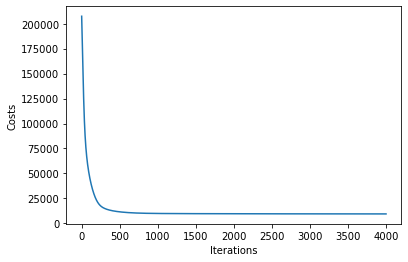

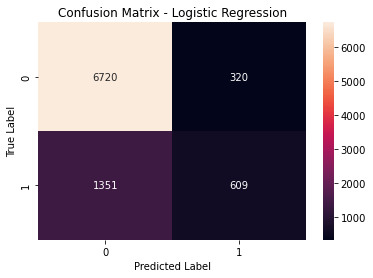

In [122]:
lr = LogisticRegression(train = Train, test = Test, epsilon=0, 
                        learningRate=0.1e-5, maxIteration=4000)
lr.fit()

#### K-fold cross validation using Logistic Regression

100%|██████████| 2000/2000 [00:01<00:00, 1272.55it/s]


For Test         Accuracy is 0.8173809523809524 and         F-1 Score is 0.4625087596355991 and          Precision is 0.6875 and           Recall is 0.3484688489968321
{
    "accuracy": 0.8094444444444444,
    "f1 score": 0.41765704584040747,
    "model": "K-Fold-1",
    "precision": 0.6243654822335025,
    "recall": 0.3137755102040816,
    "roc_auc_score": 0.6306093460111316
}


100%|██████████| 2000/2000 [00:01<00:00, 1069.60it/s]


For Test         Accuracy is 0.8114285714285714 and         F-1 Score is 0.4310344827586207 and          Precision is 0.6329113924050633 and           Recall is 0.32679738562091504
{
    "accuracy": 0.8101111111111111,
    "f1 score": 0.4196943972835314,
    "model": "K-Fold-2",
    "precision": 0.6274111675126903,
    "recall": 0.3153061224489796,
    "roc_auc_score": 0.6315877203153989
}


100%|██████████| 2000/2000 [00:01<00:00, 1011.92it/s]


For Test         Accuracy is 0.81 and         F-1 Score is 0.43243243243243246 and          Precision is 0.680089485458613 and           Recall is 0.3169968717413973
{
    "accuracy": 0.8092222222222222,
    "f1 score": 0.4125898049948683,
    "model": "K-Fold-3",
    "precision": 0.6261682242990654,
    "recall": 0.3076530612244898,
    "roc_auc_score": 0.6282583487940631
}


100%|██████████| 2000/2000 [00:02<00:00, 971.78it/s] 


For Test         Accuracy is 0.8142857142857143 and         F-1 Score is 0.43065693430656937 and          Precision is 0.676605504587156 and           Recall is 0.3158458244111349
{
    "accuracy": 0.8097777777777778,
    "f1 score": 0.4153005464480874,
    "model": "K-Fold-4",
    "precision": 0.628099173553719,
    "recall": 0.31020408163265306,
    "roc_auc_score": 0.6295338589981446
}


100%|██████████| 2000/2000 [00:02<00:00, 779.82it/s]


For Test         Accuracy is 0.8171428571428572 and         F-1 Score is 0.43529411764705883 and          Precision is 0.669683257918552 and           Recall is 0.3224400871459695
{
    "accuracy": 0.8084444444444444,
    "f1 score": 0.4163845633039946,
    "model": "K-Fold-5",
    "precision": 0.6187122736418511,
    "recall": 0.3137755102040816,
    "roc_auc_score": 0.6299701414656772
}
      model  accuracy  precision    recall  f1 score  roc_auc_score
0  K-Fold-1  0.809444   0.624365  0.313776  0.417657       0.630609
1  K-Fold-2  0.810111   0.627411  0.315306  0.419694       0.631588
2  K-Fold-3  0.809222   0.626168  0.307653  0.412590       0.628258
3  K-Fold-4  0.809778   0.628099  0.310204  0.415301       0.629534
4  K-Fold-5  0.808444   0.618712  0.313776  0.416385       0.629970


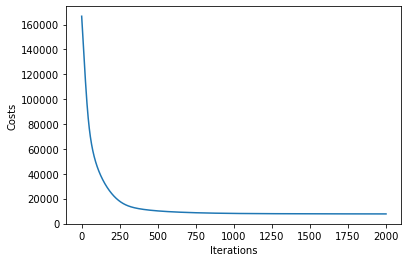

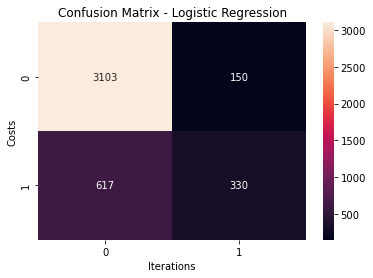

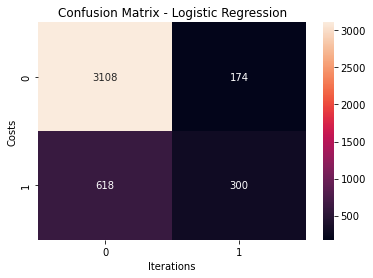

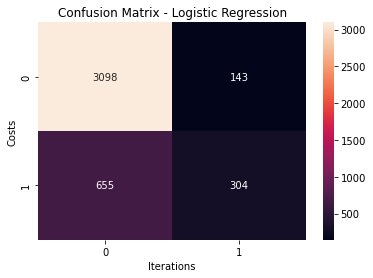

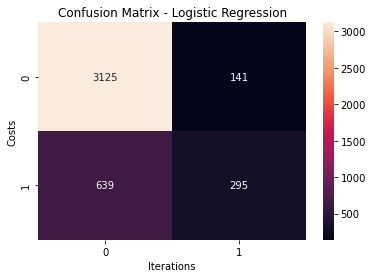

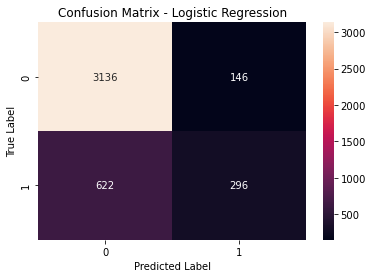

In [123]:
split = Train

from sklearn.model_selection import KFold
kf5 = KFold(n_splits=5, shuffle=True)

count = 1
lists = pd.DataFrame(columns = ['model', 'accuracy', 'precision', 'recall',
                                'f1 score', 'roc_auc_score'])

for train_index, test_index in kf5.split(split):
    lr1 = LogisticRegression(train = Train[train_index], test = Train[test_index],
                            epsilon=0, learningRate=0.1e-5, maxIteration=2000)
    lr1.fit()
    pred = np.around(lr1.sigmoid(lr1.predict(lr1.addX0(Test[:, :-1]))))
    actual = Test[:, -1]
    
    result = model_evaluation('K-Fold-'+(str(count)), actual, pred)
    
    lists.loc[len(lists)] = result.values()
    count+=1
print(lists.head())

The general procedure is as follows:

1. Shuffle the dataset randomly.
2. Split the dataset into k groups
3. For each unique group:
    - Take the group as a hold out or test data set
    - Take the remaining groups as a training data set
    - Fit a model on the training set and evaluate it on the test set
    - Retain the evaluation score and discard the model
4. Summarize the skill of the model using the sample of model evaluation scores

### Gaussian Naive Bayes Classifier

In [124]:
# Gaussian Naive Bayes Classifier
class GaussianNaiveBayes:

    def __init__(self, train, test, kf) -> None:
        self.train_df = train
        self.test_df = test
        self.kf = kf
    
    # separate the X and y from Test and train data
    def datasetReader(self):
        train_df,test_df=np.array(self.train_df,dtype=np.float64),np.array(self.test_df,dtype=np.float64)
        self.X_train,self.y_train = train_df[:, :-1], train_df[:, -1]
        self.X_test,self.y_test = test_df[:, :-1], test_df[:, -1]
        return self.X_train, self.y_train, self.X_test, self.y_test

    # Likelihood
    def fitDistribution(self, data):
        mean = np.mean(data)
        std = np.std(data)
        dist = norm(mean,std) # gaussian distribution based on the column or data value
        return dist
    
    def probability(self, X, dist, prior): # posterior
        prob = prior
        count = 0
        for each in dist:
          prob = prob * each.pdf(X[count])
          count +=1
        return prob
    
    def fit(self):
        self.X_train, self.y_train, self.X_test, self.y_test = self.datasetReader()
        
        #X0 is that points that belongs to class 0
        self.X0_train = self.X_train[self.y_train == 0] 
        #X1 is that points that belongs to class 1
        self.X1_train = self.X_train[self.y_train == 1]
        
        #calculate the priors based on train data
        self.prior_1 = len(self.X1_train)/ len(self.X_train)
        self.prior_0 = len(self.X0_train)/ len(self.X_train)

        # store the distribution value in list
        self.dist0 = []
        self.dist1 = []

        # find distribution value and append the list based on training data
        for i in range(34):
          self.dist0.append(self.fitDistribution(self.X0_train[:,i]))
          self.dist1.append(self.fitDistribution(self.X1_train[:,i]))
        if self.kf == False:
            # prediction and evaluation part
            actual = self.y_test
            pred = self.predict()
            print('Accuracy is ', metrics.accuracy_score(actual, pred))
            #print('Confusion Matrix is \n', metrics.confusion_matrix(actual, pred))
            print('F1 Score is ', metrics.f1_score(actual, pred))
            print('Precision is ', metrics.precision_score(actual, pred))
            print('Recall is ', metrics.recall_score(actual, pred))

            cm_test = metrics.confusion_matrix(actual, pred)
            #sns.set(font_scale=2)
            plt.figure()
            sns.heatmap(cm_test, annot = True, fmt = 'd')
            plt.title('Confusion Matrix - Naive Bayes Classifier')
            plt.xlabel('Predicted Label')
            plt.ylabel('True Label')

    def predict(self):
        pred = []
        # apply zip to look at 2 vectors at the same time
        for sample, target in zip(self.X_test, self.y_test):
            # posterior of class 0
            py0 = self.probability(sample, self.dist0, self.prior_0)
            # posterior of class 1
            py1 = self.probability(sample, self.dist1, self.prior_1)
            
            y_predict = np.argmax([py0,py1])
            pred.append(y_predict)      
        return pred   

Accuracy is  0.7247777777777777
F1 Score is  0.4681125187889199
Precision is  0.40415276232851316
Recall is  0.5561224489795918


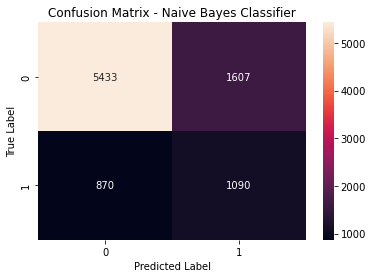

In [125]:
gnb = GaussianNaiveBayes(train = Train, test = Test, kf = False)
gnb.fit()

In [126]:
rn = Train


kf5 = KFold(n_splits=5, shuffle=True)

count = 1
lists = pd.DataFrame(columns = ['model', 'accuracy', 'precision', 'recall',
                                'f1 score', 'roc_auc_score'])
# to get the values from our data, we use .iloc to access a value at particular index
for train_index, test_index in kf5.split(rn):
    clf1 = GaussianNaiveBayes(Train[train_index], Train[test_index], kf = True)
    clf1.fit()
    predicted1 = clf1.predict()
    
    result = model_evaluation('GNB K-Fold-'+(str(count)), Train[test_index, -1], predicted1)
    
    lists.loc[len(lists)] = result.values()
    count+=1
print(lists.head())

{
    "accuracy": 0.7276190476190476,
    "f1 score": 0.471837488457987,
    "model": "GNB K-Fold-1",
    "precision": 0.40015661707126077,
    "recall": 0.5748031496062992,
    "roc_auc_score": 0.6717265521513827
}
{
    "accuracy": 0.7326190476190476,
    "f1 score": 0.48415250344510796,
    "model": "GNB K-Fold-2",
    "precision": 0.42637540453074435,
    "recall": 0.5600425079702445,
    "roc_auc_score": 0.6712455559182305
}
{
    "accuracy": 0.7342857142857143,
    "f1 score": 0.50355871886121,
    "model": "GNB K-Fold-3",
    "precision": 0.4367283950617284,
    "recall": 0.5945378151260504,
    "roc_auc_score": 0.6848920602723848
}
{
    "accuracy": 0.7278571428571429,
    "f1 score": 0.48443843031123135,
    "model": "GNB K-Fold-4",
    "precision": 0.42652899126290705,
    "recall": 0.5605427974947808,
    "roc_auc_score": 0.6689203808571992
}
{
    "accuracy": 0.7352380952380952,
    "f1 score": 0.48182665424044735,
    "model": "GNB K-Fold-5",
    "precision": 0.42727272727

### SVM Classifier

In [127]:
# SVM Classifier


class maxMarginClassifier:

      def __init__(self, C, train, test):
          self.C = C
          self.train = train
          self.test = test

      def dataReader(self):

        train_df = self.train
        test_df = self.test

        train_X, train_y = train_df.iloc[:, :-1], train_df.iloc[:, -1]
        test_X, test_y = test_df.iloc[:, :-1], test_df.iloc[:, -1]
        train_y = train_y.replace(0, -1)

        train_X = train_X.sample(frac = 0.02, replace = False, 
                                 random_state = 18).to_numpy()
        train_y = train_y.sample(frac = 0.02, replace = False,
                                 random_state = 18).to_numpy()


        return train_X, test_X, train_y, test_y

      def fit(self):

          self.train_X, self.test_X, self.train_y, self.test_y = self.dataReader()
          N = len(self.train_y)
          Xy = self.train_X*self.train_y[:, np.newaxis]
          GramXy = np.matmul(Xy, Xy.T)

          def Ld0(G, alpha):
              obj_fn = alpha.sum() - 0.5*alpha.dot(alpha.dot(G))
              return obj_fn 
          def partialDerivativeLd0(G, alpha):
              par_der = np.ones_like(alpha) - alpha.dot(G)
              return par_der
          
          A = np.vstack((-np.eye(N), np.eye(N)))
          b = concatenate((np.zeros(N), self.C*np.ones(N)))
          constraints = ({'type': 'eq', 'fun': lambda a:np.dot(a, self.train_y), 'jac': lambda a: self.train_y},
                         {'type': 'ineq', 'fun': lambda a: b - np.dot(A, a), 'jac': lambda a: -A})
          
          alpha = np.ones(N)
          optRes = optimize.minimize(fun = lambda a: -Ld0(GramXy, a),
                                     x0 = alpha,
                                     method = 'SLSQP',
                                     jac = lambda a: -partialDerivativeLd0(GramXy, a),
                                     constraints=constraints)
          
          self.alpha = optRes.x
          self.w = np.sum(self.alpha[:, np.newaxis]*Xy, axis = 0)

          epsilon = 1e-4
          self.supportVectors = self.train_X[self.alpha > epsilon]
          self.supportLabels = self.train_y[self.alpha > epsilon]

          b = []
          for i in range(len(self.supportLabels)):
              b_i = self.supportLabels[i] - np.matmul(self.supportVectors[i].T, self.w)
              b.append(b_i)

          self.intercept = sum(b)/len(b)
          pred = self.predict(self.test_X)
          pred = pred.replace(-1, 0)
          actual = self.test_y
          print('Accuracy is ', metrics.accuracy_score(pred, actual))
          #print('Confusion Matrix is \n', metrics.confusion_matrix(actual, pred))
          print('F1 Score is ', metrics.f1_score(actual, pred))
          print('Precision is ', metrics.precision_score(actual, pred))
          print('Recall is ', metrics.recall_score(actual, pred))
          cm_test = metrics.confusion_matrix(actual, pred)
          #sns.set(font_scale=2)
          plt.figure()
          sns.heatmap(cm_test, annot = True, fmt = 'd')
          plt.title('Confusion Matrix - SVM Classifier')
          plt.xlabel('Predicted Label')
          plt.ylabel('True Label')
          

      def predict(self, X):
          return 2*(np.matmul(X, self.w) + self.intercept > 0) - 1

Accuracy is  0.7861111111111111
F1 Score is  0.450157097972008
Precision is  0.5113562621674238
Recall is  0.4020408163265306


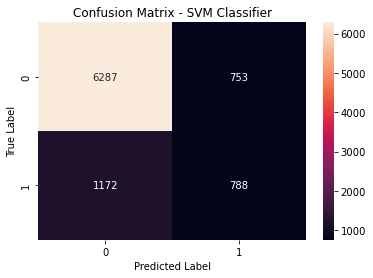

In [128]:
model = maxMarginClassifier(C = 5, train = Train_SVM, test = Test_SVM)
model.fit()

#### SVM with Kernel function

In [129]:
# SVM Classifier with Kernel Trick { vertical-output: true }



class kernelMaxMarginClassifier:

      def __init__(self, C, train, test, kernel):
          self.C = C
          self.train = train
          self.test = test
          self.kernel = kernel

      def dataReader(self):

        train_df = self.train
        test_df = self.test

        train_X, train_y = train_df.iloc[:, :-1], train_df.iloc[:, -1]
        test_X, test_y = test_df.iloc[:, :-1], test_df.iloc[:, -1]
        train_y = train_y.replace(0, -1)

        train_X = train_X.sample(frac = 0.01, replace = False, 
                                 random_state = 18).to_numpy()
        train_y = train_y.sample(frac = 0.01, replace = False,
                                 random_state = 18).to_numpy()


        return train_X, test_X, train_y, test_y

      def fit(self):

          self.train_X, self.test_X, self.train_y, self.test_y = self.dataReader()
          N = len(self.train_y)
          hXX = np.apply_along_axis(lambda x1 : np.apply_along_axis(lambda x2:  self.kernel(x1, x2), 1, self.train_X),
                                  1, self.train_X)  
          #Xy = self.train_X*self.train_y[:, np.newaxis]
          GramhXXy = hXX*np.matmul(self.train_y, self.train_y.T)
          #GramXy = np.matmul(Xy, Xy.T)

          def Ld0(G, alpha):
              obj_fn = alpha.sum() - 0.5*alpha.dot(alpha.dot(G))
              return obj_fn 
          def partialDerivativeLd0(G, alpha):
              par_der = np.ones_like(alpha) - alpha.dot(G)
              return par_der
          
          A = np.vstack((-np.eye(N), np.eye(N)))
          b = concatenate((np.zeros(N), self.C*np.ones(N)))
          constraints = ({'type': 'eq', 'fun': lambda a:np.dot(a, self.train_y), 'jac': lambda a: self.train_y},
                         {'type': 'ineq', 'fun': lambda a: b - np.dot(A, a), 'jac': lambda a: -A})
          
          alpha = np.ones(N)
          optRes = optimize.minimize(fun = lambda a: -Ld0(GramhXXy, a),
                                     x0 = alpha,
                                     method = 'SLSQP',
                                     jac = lambda a: -partialDerivativeLd0(GramhXXy, a),
                                     constraints=constraints)
          
          self.alpha = optRes.x
          self.w = np.sum(self.alpha[:, np.newaxis]*hXX, axis = 0)

          epsilon = 1e-6
          self.supportVectors = self.train_X[self.alpha > epsilon]
          self.supportLabels = self.train_y[self.alpha > epsilon]
          self.supportYalphas = self.train_y[self.alpha > epsilon]*self.alpha[self.alpha > epsilon]


          #b = []
          #for i in range(len(self.supportLabels)):
          #    b_i = self.supportLabels[i] - np.matmul(self.supportVectors[i], self.w)
          #    b.append(b_i)

          #self.intercept = sum(b)/len(b)
          pred = pd.DataFrame(self.predict(self.test_X))
          pred = pred.replace(-1, 0)
          actual = self.test_y
          print('Accuracy is ', metrics.accuracy_score(pred, actual))
          #print('Confusion Matrix is \n', metrics.confusion_matrix(actual, pred))
          print('F1 Score is ', metrics.f1_score(actual, pred))
          print('Precision is ', metrics.precision_score(actual, pred))
          print('Recall is ', metrics.recall_score(actual, pred))

          cm_test = metrics.confusion_matrix(actual, pred)
          #sns.set(font_scale=2)
          plt.figure()
          sns.heatmap(cm_test, annot = True, fmt = 'd')
          plt.title('Confusion Matrix - SVM with Kernel trick')
          plt.xlabel('Predicted Label')
          plt.ylabel('True Label')

      def predict(self, X):
          def predict1(x):
              x1 = np.apply_along_axis(lambda s: self.kernel(s, x), 1, self.supportVectors)
              x2 = x1 * self.supportYalphas
              return np.sum(x2)
          func = np.apply_along_axis(predict1, 1, X)
          return 2*(func > 0) - 1

In [130]:
# Gaussian Radial Basis Function Kernel
def GRBF(x1, x2):
    diff = x1 - x2
    return np.exp(-np.dot(diff, diff) * len(x1) / 2)

Accuracy is  0.7012222222222222
F1 Score is  0.37040505736361506
Precision is  0.3422760709649502
Recall is  0.4035714285714286


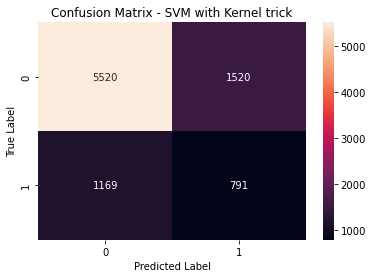

In [131]:
ksvm = kernelMaxMarginClassifier(C=5, train=Train_SVM, test=Test_SVM, kernel=GRBF)
ksvm.fit()

### Model Implementation with Balanced Data

All the Models we implemented before were implemented using data which was imbalanced. The majority class was Y with a value '0' which specifies that the given client did not default on their credit card payment. If the samples in the training set are not evenly distributed, we may run the risk of creating a model that is naive and just push the Y value to majority class and still have a good accuracy and precision score, but, this model will have not learned anything meaningful and may misclassify the clients that will actually default on their payment thus causing a huge problem.

#### Over Sampling Method

In [132]:
!pip install imbalanced-learn

In [133]:
from imblearn.over_sampling import SMOTE
from collections import Counter

smote = SMOTE(k_neighbors=10)
X = Train_Balance.iloc[:, :-1]
y = Train_Balance.iloc[:, -1]

# fit target and predictor variable
x_smote , y_smote = smote.fit_resample(X, y)

print('Original dataset shape:', Counter(y))
print('Resampled dataset shape:', Counter(y_smote))

Original dataset shape: Counter({0: 16324, 1: 4676})
Resampled dataset shape: Counter({1: 16324, 0: 16324})


In [134]:
Train_smote = pd.merge(left = x_smote, right = y_smote,  left_index=True,
                       right_index=True)
Train_smote = np.array(Train_smote, dtype=np.float64)

100%|██████████| 3000/3000 [00:10<00:00, 281.04it/s]


For Test         Accuracy is 0.7476666666666667 and         F-1 Score is 0.5040401834461673 and          Precision is 0.4406261932035128 and           Recall is 0.5887755102040816


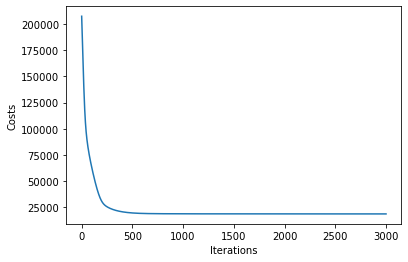

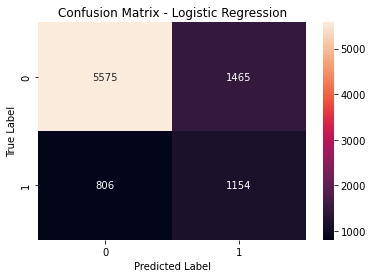

In [135]:
lr = LogisticRegression(train = Train_smote, test = Test, epsilon=0, 
                        learningRate=0.1e-5, maxIteration=3000)
lr.fit()

Accuracy is  0.7247777777777777
F1 Score is  0.4681125187889199
Precision is  0.40415276232851316
Recall is  0.5561224489795918


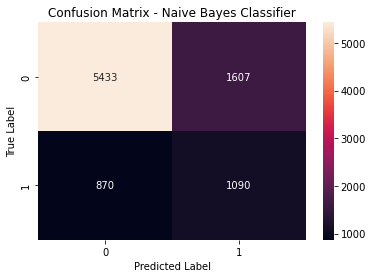

In [136]:
gnb = GaussianNaiveBayes(train = Train, test = Test, kf = False)
gnb.fit()

Accuracy is  0.6903333333333334
F1 Score is  0.4708562749193089
Precision is  0.3749622013909888
Recall is  0.6326530612244898


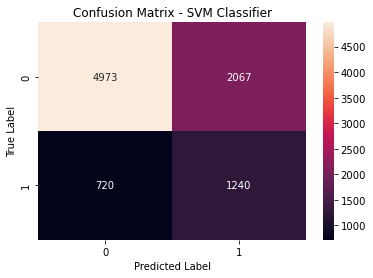

In [137]:
Train_smote = pd.merge(left = x_smote, right = y_smote,  left_index=True,
                       right_index=True)
svm = maxMarginClassifier(C = 5, train = Train_smote, test = Test_SVM)
svm.fit()

Accuracy is  0.5728888888888889
F1 Score is  0.4067901234567901
Precision is  0.2915929203539823
Recall is  0.6724489795918367


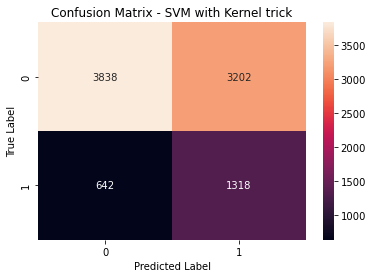

In [138]:
ksvm = kernelMaxMarginClassifier(C=5, train=Train_smote, test=Test_SVM, kernel=GRBF)
ksvm.fit()

#### Under Sampling

In [139]:
from sklearn.utils import resample
Train_Undersample = Train_Balance[Train_Balance.Y == 0]
Train_Minority = Train_Balance[Train_Balance.Y == 1]
Train_Undersample = resample(Train_Undersample, replace=False, 
                             n_samples=len(Train_Balance[Train_Balance.Y == 1]), 
                             random_state=18)
Train_Undersample = pd.concat([Train_Undersample, Train_Minority])
print('Original dataset shape:', Counter(Train_Balance.iloc[:, -1]))
print('Resampled dataset shape:', Counter(Train_Undersample.iloc[:, -1]))

Original dataset shape: Counter({0: 16324, 1: 4676})
Resampled dataset shape: Counter({0: 4676, 1: 4676})


In [140]:
lr_Train_Undersample = np.array(Train_Undersample, dtype=np.float64)

100%|██████████| 4000/4000 [00:01<00:00, 2961.32it/s]


For Test         Accuracy is 0.7385555555555555 and         F-1 Score is 0.4994681982556903 and          Precision is 0.4283108354615104 and           Recall is 0.5989795918367347


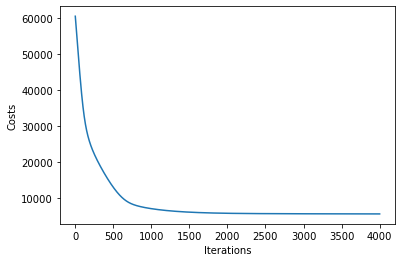

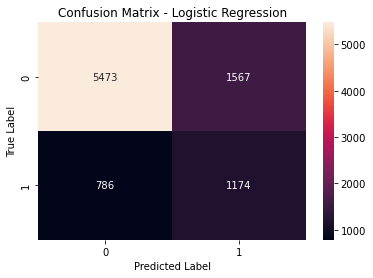

In [141]:
lr = LogisticRegression(train = lr_Train_Undersample, test = Test, epsilon=0, 
                        learningRate=0.1e-5, maxIteration=4000)
lr.fit()

Accuracy is  0.6155555555555555
F1 Score is  0.41395663956639567
Precision is  0.30983772819472616
Recall is  0.6234693877551021


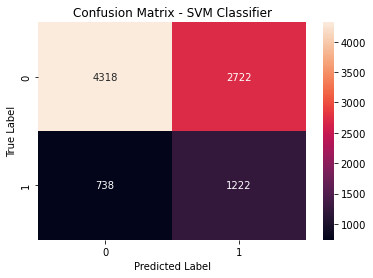

In [142]:
model = maxMarginClassifier(C = 5, train = Train_Undersample, test = Test_SVM)
model.fit()

Accuracy is  0.5821111111111111
F1 Score is  0.36329778229219567
Precision is  0.27185203952368886
Recall is  0.5474489795918367


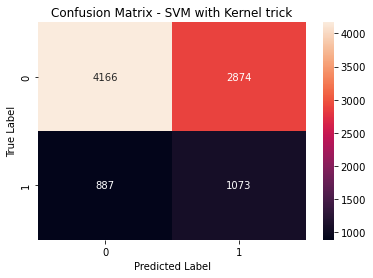

In [143]:
ksvm = kernelMaxMarginClassifier(C=5, train=Train_Undersample, test=Test_SVM, kernel=GRBF)
ksvm.fit()

Accuracy is  0.6955555555555556
F1 Score is  0.4625343271871322
Precision is  0.375717017208413
Recall is  0.601530612244898


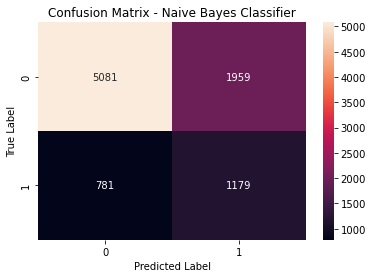

In [144]:
gnb = GaussianNaiveBayes(train = Train_Undersample, test = Test, kf = False)
gnb.fit()